<a href="https://colab.research.google.com/github/UW-CTRL/AA548-spr2024/blob/main/homework/hw2_problem4_starter_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp


In [137]:
dt = 0.1
goal_state = np.zeros(4)
initial_state = np.array([-4, 0., -1., 2.])
u_max = 2.

### put your code here ###

A_dynamics = np.array([[1., 0., dt, 0.],
                        [0., 1., 0., dt],
                        [0., 0., 1., 0.],
                        [0., 0., 0., 1.]])

B_dynamics = np.array([[0.5*dt**2, 0.],
                        [0., 0.5*dt**2],
                        [dt, 0.],
                        [0.,  dt]])




T = 50  # time steps
n = 4   # state dimension
m = 2   # control dimension

us = cp.Variable([T,m])   # optimization variable.
xs = cp.Variable([T,n]) 

goal_state = np.zeros(n)
# quadratic cost matrices
Q = np.diag([1., 1., 1., 1.])
R = np.diag([1., 1.])


objective =  0
constraints = []


state = initial_state
constraints += [xs[0] == initial_state]
for t in range(T):
    objective += (cp.quad_form(state, Q) + cp.quad_form(us[t], R))
    state = A_dynamics @ state + B_dynamics @ us[t]
    constraints += [cp.norm(us[t], 2) <= u_max]

constraints += [state == goal_state]


problem = cp.Problem(cp.Minimize(objective), constraints)
problem.solve()


604.1460607145349

In [138]:
states = [initial_state]
for t in range(T):
    states.append(A_dynamics @ states[t] + B_dynamics @ us.value[t])
states = np.stack(states)

controls = us.value

## Plotting reults

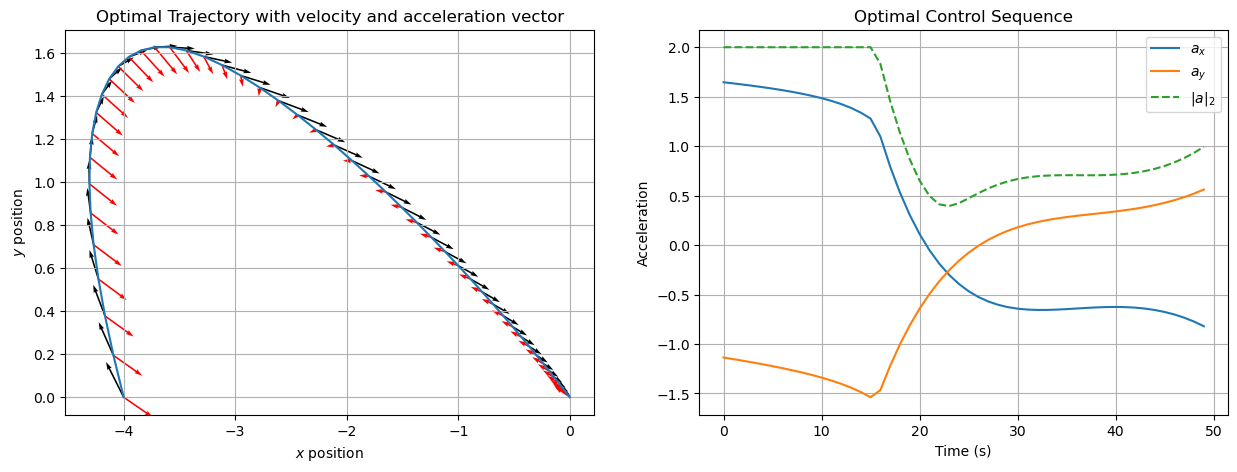

In [139]:


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(states[:,0], states[:,1])
plt.quiver(states[:,0], states[:,1], states[:,2], states[:,3], scale=30, width=.003)  # show velocity vector
plt.quiver(states[:-1,0], states[:-1,1], controls[:,0], controls[:,1], scale=30, width=.003, color='red')  # show acceleration vector
plt.title("Optimal Trajectory with velocity and acceleration vector")
plt.xlabel("$x$ position")
plt.ylabel("$y$ position")
plt.grid()

plt.subplot(1,2,2)
plt.plot(controls)
plt.plot(np.linalg.norm(controls, 2, axis=1), '--')
plt.title("Optimal Control Sequence")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration")
plt.legend(["$a_x$", "$a_y$", "$\|a\|_2$"])
plt.grid()

### plotting x and y, and computing which time step the state reaches within 10E-1 of goal state

Time step when within 1E-1 to goal state: 49


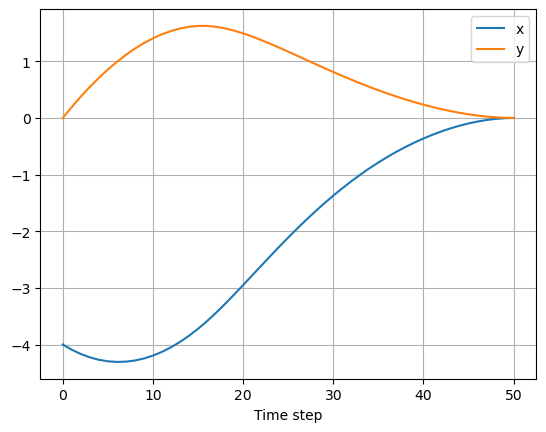

In [122]:
plt.plot(states[:,0], label="x")
plt.plot(states[:,1], label="y")
plt.xlabel("Time step")
plt.legend()
plt.grid()
k_close = np.where(np.linalg.norm(states - goal_state, 2, axis=1) < 1E-1)[0][0]
print("Time step when within 1E-1 to goal state: %i"%k_close)

In [183]:
dt = 0.1
goal_state = np.zeros(4)
initial_state = np.array([-4, 0., -1., 2.])
u_max = 2.

### put your code here ###

A_dynamics = np.array([[1., 0., dt, 0.],
                        [0., 1., 0., dt],
                        [0., 0., 1., 0.],
                        [0., 0., 0., 1.]])

B_dynamics = np.array([[0.5*dt**2, 0.],
                        [0., 0.5*dt**2],
                        [dt, 0.],
                        [0.,  dt]])




T = 50  # time steps
n = 4   # state dimension
m = 2   # control dimension

us2 = cp.Variable([T,m])   # optimization variable.
xs2 = cp.Variable([T,n]) 

goal_state = np.zeros(n)
# quadratic cost matrices
Q = np.diag([50., 50., 50., 50.])
R = np.diag([1., 1.])


objective2 =  0
constraints2 = []


state2 = initial_state
constraints2 += [xs2[0] == initial_state]
for t in range(T):
    objective2 += (cp.quad_form(state2, Q) + cp.quad_form(us2[t], R))
    state2 = A_dynamics @ state2 + B_dynamics @ us2[t]
    constraints2 += [cp.norm(us2[t], 2) <= u_max]

constraints2 += [state2 == goal_state]


problem = cp.Problem(cp.Minimize(objective2), constraints2)
problem.solve()


/home/p8410077/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


25612.230258706346

In [184]:
states2 = [initial_state]
for t in range(T):
    states2.append(A_dynamics @ states2[t] + B_dynamics @ us2.value[t])
states2 = np.stack(states2)

controls2 = us2.value

In [191]:
dt = 0.1
goal_state = np.zeros(4)
initial_state = np.array([-4, 0., -1., 2.])
u_max = 2.

### put your code here ###

A_dynamics = np.array([[1., 0., dt, 0.],
                        [0., 1., 0., dt],
                        [0., 0., 1., 0.],
                        [0., 0., 0., 1.]])

B_dynamics = np.array([[0.5*dt**2, 0.],
                        [0., 0.5*dt**2],
                        [dt, 0.],
                        [0.,  dt]])




T = 50  # time steps
n = 4   # state dimension
m = 2   # control dimension

us3 = cp.Variable([T,m])   # optimization variable.
xs3 = cp.Variable([T,n]) 

goal_state = np.zeros(n)
# quadratic cost matrices
Q = np.diag([1., 1., 1., 1.])
R = np.diag([50., 50.])


objective3 =  0
constraints3 = []


state3 = initial_state
constraints3 += [xs3[0] == initial_state]
for t in range(T):
    objective3 += (cp.quad_form(state3, Q) + cp.quad_form(us3[t], R))
    state3 = A_dynamics @ state3 + B_dynamics @ us3[t]
    constraints3 += [cp.norm(us3[t], 2) <= u_max]

constraints3 += [state3 == goal_state]


problem = cp.Problem(cp.Minimize(objective3), constraints3)
problem.solve()


/home/p8410077/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


4311.39760964944

In [192]:
states3 = [initial_state]
for t in range(T):
    states3.append(A_dynamics @ states3[t] + B_dynamics @ us3.value[t])
states3 = np.stack(states3)

controls3 = us3.value

In [199]:
dt = 0.1
goal_state = np.zeros(4)
initial_state = np.array([-4, 0., -1., 2.])
u_max = 20.

### put your code here ###

A_dynamics = np.array([[1., 0., dt, 0.],
                        [0., 1., 0., dt],
                        [0., 0., 1., 0.],
                        [0., 0., 0., 1.]])

B_dynamics = np.array([[0.5*dt**2, 0.],
                        [0., 0.5*dt**2],
                        [dt, 0.],
                        [0.,  dt]])




T = 50  # time steps
n = 4   # state dimension
m = 2   # control dimension

us4 = cp.Variable([T,m])   # optimization variable.
xs4 = cp.Variable([T,n]) 

goal_state = np.zeros(n)
# quadratic cost matrices
Q = np.diag([50., 50., 50., 50.])
R = np.diag([1., 1.])


objective4 =  0
constraints4 = []


state4 = initial_state
constraints4 += [xs4[0] == initial_state]
for t in range(T):
    objective4 += (cp.quad_form(state4, Q) + cp.quad_form(us4[t], R))
    state4 = A_dynamics @ state4 + B_dynamics @ us4[t]
    constraints4 += [cp.norm(us4[t], 2) <= u_max]

constraints4 += [state4 == goal_state]


problem = cp.Problem(cp.Minimize(objective4), constraints4)
problem.solve()


10800.148006298885

In [200]:
states4 = [initial_state]
for t in range(T):
    states4.append(A_dynamics @ states4[t] + B_dynamics @ us4.value[t])
states4 = np.stack(states4)

controls4 = us4.value

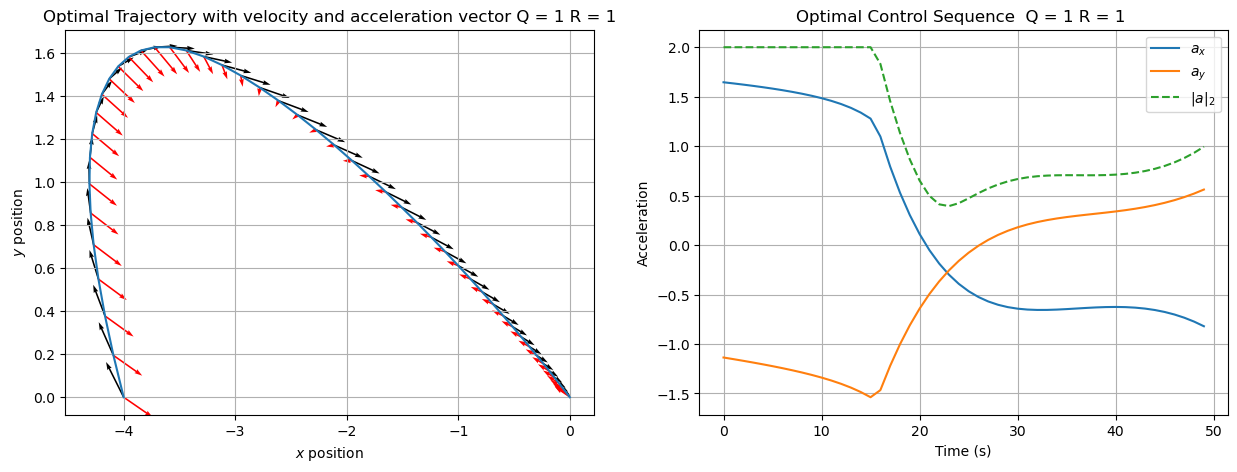

In [178]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(states[:,0], states[:,1])
plt.quiver(states[:,0], states[:,1], states[:,2], states[:,3], scale=30, width=.003)  # show velocity vector
plt.quiver(states[:-1,0], states[:-1,1], controls[:,0], controls[:,1], scale=30, width=.003, color='red')  # show acceleration vector
plt.title("Optimal Trajectory with velocity and acceleration vector Q = 1 R = 1")
plt.xlabel("$x$ position")
plt.ylabel("$y$ position")
plt.grid()

plt.subplot(1,2,2)
plt.plot(controls)
plt.plot(np.linalg.norm(controls, 2, axis=1), '--')
plt.title("Optimal Control Sequence  Q = 1 R = 1 ")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration")
plt.legend(["$a_x$", "$a_y$", "$\|a\|_2$"])
plt.grid()

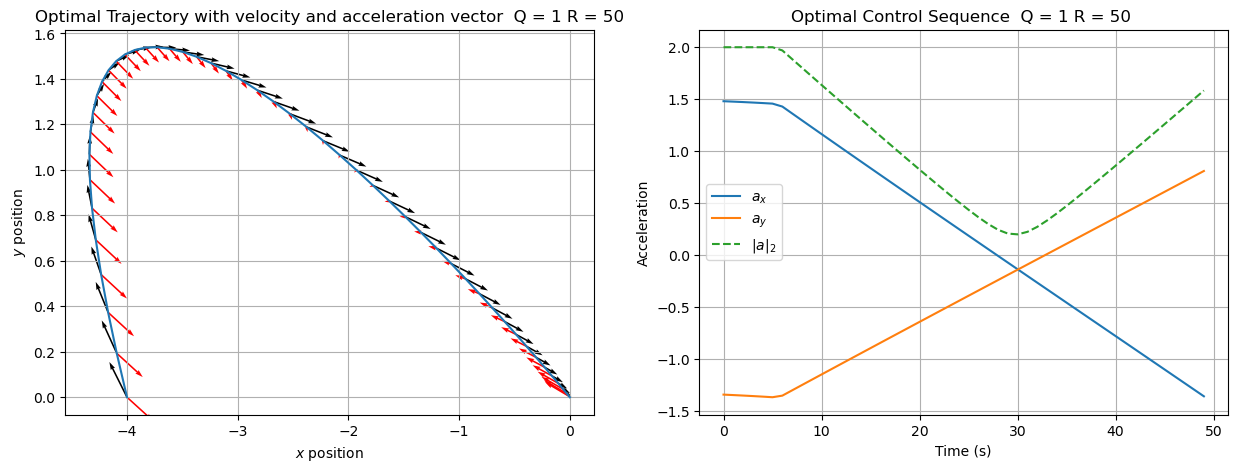

In [179]:


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(states2[:,0], states2[:,1])
plt.quiver(states2[:,0], states2[:,1], states2[:,2], states2[:,3], scale=30, width=.003)  # show velocity vector
plt.quiver(states2[:-1,0], states2[:-1,1], controls2[:,0], controls2[:,1], scale=30, width=.003, color='red')  # show acceleration vector
plt.title("Optimal Trajectory with velocity and acceleration vector  Q = 1 R = 50")
plt.xlabel("$x$ position")
plt.ylabel("$y$ position")
plt.grid()

plt.subplot(1,2,2)
plt.plot(controls2)
plt.plot(np.linalg.norm(controls2, 2, axis=1), '--')
plt.title("Optimal Control Sequence  Q = 1 R = 50 ")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration")
plt.legend(["$a_x$", "$a_y$", "$\|a\|_2$"])
plt.grid()

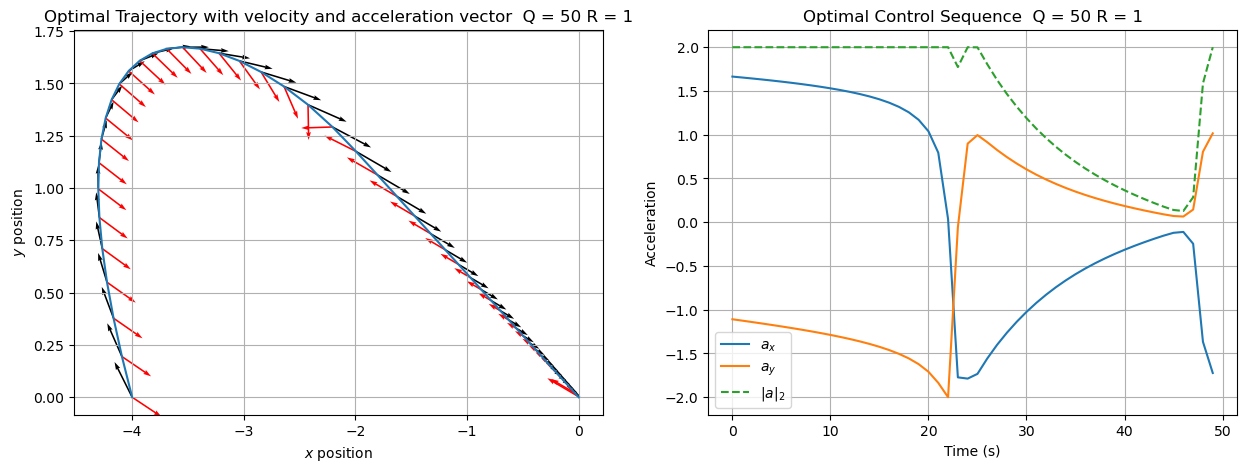

In [180]:


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(states3[:,0], states3[:,1])
plt.quiver(states3[:,0], states3[:,1], states3[:,2], states3[:,3], scale=30, width=.003)  # show velocity vector
plt.quiver(states3[:-1,0], states3[:-1,1], controls3[:,0], controls3[:,1], scale=30, width=.003, color='red')  # show acceleration vector
plt.title("Optimal Trajectory with velocity and acceleration vector  Q = 50 R = 1")
plt.xlabel("$x$ position")
plt.ylabel("$y$ position")
plt.grid()

plt.subplot(1,2,2)
plt.plot(controls3)
plt.plot(np.linalg.norm(controls3, 2, axis=1), '--')
plt.title("Optimal Control Sequence  Q = 50 R = 1")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration")
plt.legend(["$a_x$", "$a_y$", "$\|a\|_2$"])
plt.grid()

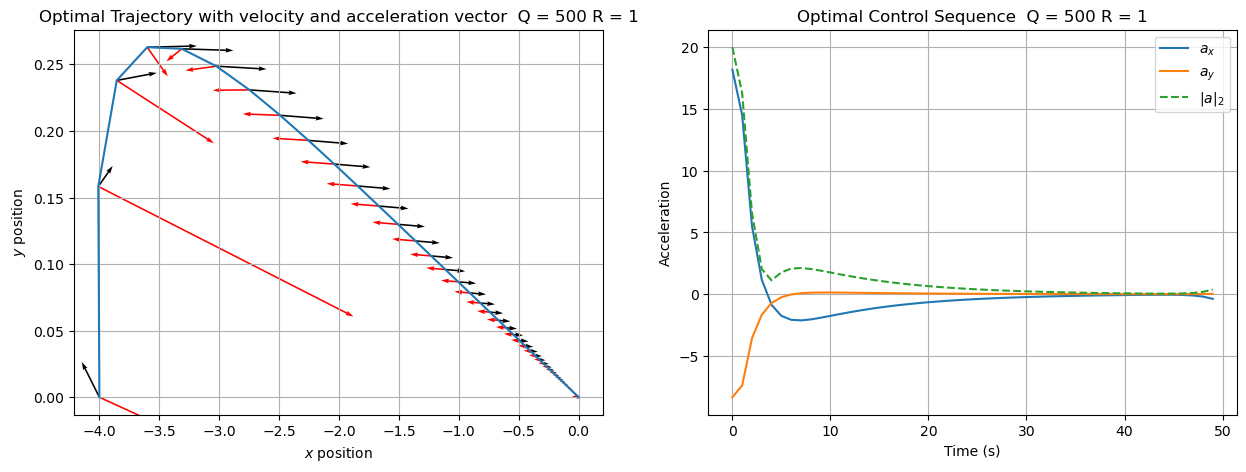

In [203]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(states4[:,0], states4[:,1])
plt.quiver(states4[:,0], states4[:,1], states4[:,2], states4[:,3], scale=30, width=.003)  # show velocity vector
plt.quiver(states4[:-1,0], states4[:-1,1], controls4[:,0], controls4[:,1], scale=30, width=.003, color='red')  # show acceleration vector
plt.title("Optimal Trajectory with velocity and acceleration vector  Q = 500 R = 1")
plt.xlabel("$x$ position")
plt.ylabel("$y$ position")
plt.grid()

plt.subplot(1,2,2)
plt.plot(controls4)
plt.plot(np.linalg.norm(controls4, 2, axis=1), '--')
plt.title("Optimal Control Sequence  Q = 500 R = 1")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration")
plt.legend(["$a_x$", "$a_y$", "$\|a\|_2$"])
plt.grid()

Time step when within 1E-1 to goal state: 49
Time step when within 1E-1 to goal state: 50
Time step when within 1E-1 to goal state: 50
Time step when within 1E-1 to goal state: 43


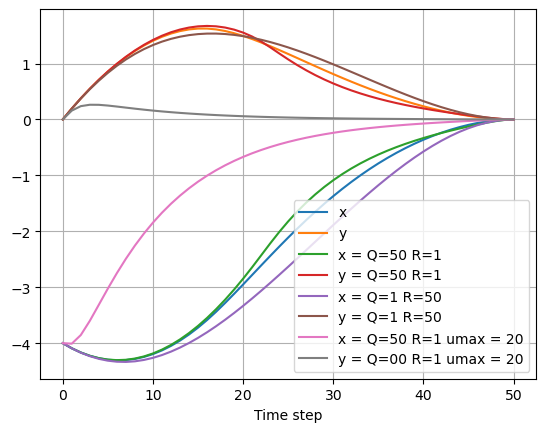

In [202]:
plt.plot(states[:,0], label="x")
plt.plot(states[:,1], label="y")
plt.plot(states2[:,0], label="x = Q=50 R=1")
plt.plot(states2[:,1], label="y = Q=50 R=1")
plt.plot(states3[:,0], label="x = Q=1 R=50")
plt.plot(states3[:,1], label="y = Q=1 R=50")
plt.plot(states4[:,0], label="x = Q=50 R=1 umax = 20")
plt.plot(states4[:,1], label="y = Q=00 R=1 umax = 20")
plt.xlabel("Time step")
plt.legend()
plt.grid()
k_close = np.where(np.linalg.norm(states - goal_state, 2, axis=1) < 1E-1)[0][0]
print("Time step when within 1E-1 to goal state: %i"%k_close)

k_close = np.where(np.linalg.norm(states2 - goal_state, 2, axis=1) < 1E-1)[0][0]
print("Time step when within 1E-1 to goal state: %i"%k_close)

k_close = np.where(np.linalg.norm(states3 - goal_state, 2, axis=1) < 1E-1)[0][0]
print("Time step when within 1E-1 to goal state: %i"%k_close)

k_close = np.where(np.linalg.norm(states4 - goal_state, 2, axis=1) < 1E-1)[0][0]
print("Time step when within 1E-1 to goal state: %i"%k_close)